### This script processes downloaded grib files

In [19]:
import xarray as xr # useful to read grib file
import numpy as np
import matplotlib.pyplot as plt

# show display videos
%matplotlib notebook 

In [2]:
# Load dataset
ds = xr.open_dataset('era5_full_hourly_bhutan/2m_temperature_1979.grib', engine='cfgrib')
temp_celsius = ds['t2m'] - 273.15

In [4]:
ds

<xarray.Dataset>
Dimensions:     (time: 8760, latitude: 9, longitude: 15)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1979-01-01 ... 1979-12-31T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 28.5 28.25 28.0 27.75 ... 27.0 26.75 26.5
  * longitude   (longitude) float64 88.5 88.75 89.0 89.25 ... 91.5 91.75 92.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    t2m         (time, latitude, longitude) float32 254.6 255.2 ... 286.7 287.2
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-12T15:58 GRIB to CDM+CF via cfgrib-0.9.1...

Using grid point at lat: 27.5, lon: 90.5


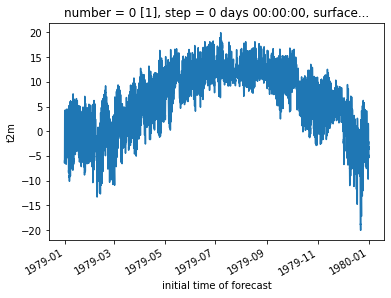

In [11]:
# Target location
target_lat, target_lon = 27.5, 90.5

# Get arrays of actual coordinates
lat_vals = ds.latitude.values
lon_vals = ds.longitude.values

# Get index of nearest values
lat_idx = np.abs(lat_vals - target_lat).argmin()
lon_idx = np.abs(lon_vals - target_lon).argmin()

# Access via .isel instead of .sel
temp_series = temp_celsius.isel(latitude=lat_idx, longitude=lon_idx)

# Optional: get actual lat/lon used
actual_lat = lat_vals[lat_idx]
actual_lon = lon_vals[lon_idx]
print(f"Using grid point at lat: {actual_lat}, lon: {actual_lon}")

# Plot
temp_series.plot()

<IPython.core.display.Javascript object>


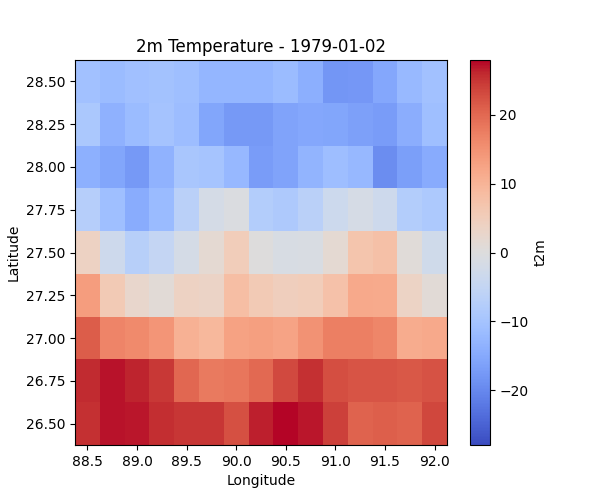

In [16]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Convert to Celsius
temp_c = ds['t2m'] - 273.15

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 5))

# Initial plot
p = temp_c.isel(time=0).plot.pcolormesh(
    ax=ax,
    cmap='coolwarm',
    add_colorbar=True,
    add_labels=True
)

# Title to update with timestamp
title = ax.set_title(str(temp_c.time.values[0]))

# Animation update function
def update(frame):
    ax.clear()
    temp_c.isel(time=frame).plot.pcolormesh(
        ax=ax,
        cmap='coolwarm',
        add_colorbar=False,  # Avoid duplicating the colorbar
        add_labels=True
    )
    timestamp = str(temp_c.time.values[frame])[:10]
    ax.set_title(f"2m Temperature - {timestamp}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# Create the animation
ani = animation.FuncAnimation(
    fig, update,
    frames=len(temp_c.time),
    interval=200  # in milliseconds
)

# Show animation in notebook (if you're in Jupyter)
plt.show()

# Optional: Save as video
# ani.save("bhutan_temp_animation.mp4", fps=10)
